<a href="https://colab.research.google.com/github/BasheerAhmedk/Machine-Learning-Projects/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mnist = keras.datasets.mnist
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


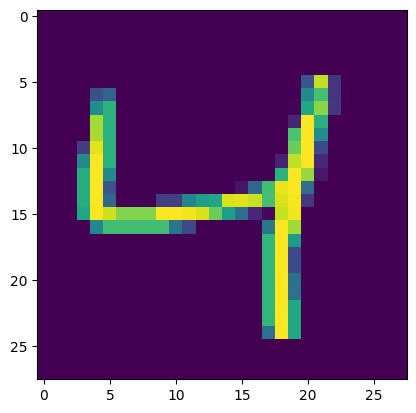

In [ ]:
plt.imshow(x_train_full[2])

In [ ]:
x_train_norm = x_train_full/255.
x_test_norm = x_test/255.
x_valid, x_train = x_train_norm[:5000], x_train_norm[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_norm
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model_history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6314 - accuracy: 0.8324 - val_loss: 0.3152 - val_accuracy: 0.9114
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2908 - accuracy: 0.9172 - val_loss: 0.2479 - val_accuracy: 0.9312
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2377 - accuracy: 0.9323 - val_loss: 0.2058 - val_accuracy: 0.9406
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2029 - accuracy: 0.9420 - val_loss: 0.1822 - val_accuracy: 0.9488
Epoch 5/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1769 - accuracy: 0.9496 - val_loss: 0.1613 - val_accuracy: 0.9540
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1567 - accuracy: 0.9557 - val_loss: 0.1474 - val_accuracy: 0.9570
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1403 - accuracy: 0.9605 - val_loss: 0.1349 - val_accurac

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0703 - accuracy: 0.9780


[0.07030189782381058, 0.9779999852180481]

In [ ]:
x_sample = x_test[:5]
y_probability = model.predict(x_sample)

1/1 [==============================] - 0s 34ms/step


In [ ]:
y_probability.round()

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_predict = model.predict(x_sample)
y_predict

1/1 [==============================] - 0s 49ms/step


array([[1.43726606e-06, 5.82258153e-08, 4.88204641e-05, 5.80312160e-04,
        6.11427797e-09, 2.67720281e-07, 3.95059072e-12, 9.99340713e-01,
        5.43383112e-06, 2.29535308e-05],
       [2.81919313e-07, 3.73876574e-05, 9.99921918e-01, 3.71399656e-05,
        1.17769318e-14, 2.92923062e-07, 1.28403201e-07, 4.07593853e-13,
        2.84720295e-06, 2.87536481e-14],
       [1.39682506e-05, 9.97114182e-01, 2.55285559e-04, 7.72549611e-05,
        2.50583369e-04, 1.51779517e-04, 3.31507290e-05, 1.76731660e-03,
        2.94800760e-04, 4.17242882e-05],
       [9.99880075e-01, 4.18584591e-07, 8.39982313e-05, 1.23252926e-06,
        1.33046196e-08, 3.50866844e-06, 1.44211581e-05, 1.14678742e-05,
        2.27894548e-09, 4.84963402e-06],
       [6.18048171e-06, 5.17714618e-08, 1.39803096e-05, 5.44411662e-08,
        9.96517062e-01, 2.74770713e-07, 1.00447205e-05, 2.82713852e-04,
        6.11437463e-06, 3.16359778e-03]], dtype=float32)